# Problem Statement
- The problem at hand is to develop a predictive model that can accurately predict customer churn in a bank. The dataset provided contains details of the bank's customers, with a binary target variable indicating whether the customer has closed their account or continues to be a customer. The goal of this notebook is to analyze the dataset, identify key factors that contribute to customer churn, and build a predictive model using Logistic Regression, that can effectively forecast whether a customer is likely to leave the bank. 

## Objective
- The objective of this project is to analyze and predict customer churn in a banking institution based on the provided dataset. The dataset contains information about customers, including their credit score, geographic location, gender, age, tenure, balance, number of products, credit card status, activity status, estimated salary, and churn status. The objective is to accurately predict whether a customer is likely to churn or not. Churn refers to the situation where a customer discontinues using the bank's services or closes their account. By predicting churn, the bank can take proactive measures to retain customers, improve customer satisfaction, and minimize revenue loss.

## Proposed Solution

- The proposed solution will involve data preprocessing, understanding data, fixing imabalances in the data, exploratory data analysis, getting the best features and finally using machine learning models. By getting insights into data, working with it and understanding it, we can help banks to predict if a customer will leave the bank or not.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
df = pd.read_csv("/kaggle/input/churn-modeling-dataset/Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


As we see in the data, fields like RowNumber, CustomerId and Surname do not matter at all during out analysis. They are just additional infomration about the bank customers. So, we go ahead and drop these three columns.

In [3]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)


The dataset after dropping the columns looks like the one printed below.

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 11)

### Data Description and Processing


Let us start understanding what our data actually has and various other things about the features like distribution, outliers, NA/missing values etc.

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

On looking the <b>Exited</b> column, which will be our target variable, we see that there is a huge imbalance in data. Class 2 is almost 1/4th of Class 1. We will fix this before training the model.

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The above code shows that there is no NA value in our dataset, so we don't need to go with any imputation methods.

But, what we notice is, there is a significant difference between the 25th percentile and 75th percentile, indicating heavy skewness. So let us look into the skewness and work with it.

In [10]:
df.skew()

/tmp/ipykernel_290/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

The numbers indicate how skewed the data is, 0 means perfectly normal, positive values indicate right skewed and negative values indicate left skewed dataset.

We see it is heavily skewed, especially Age, Balance, NumOfProducts, CreditScore. Let us plot graphs for each of them and understand deeper.

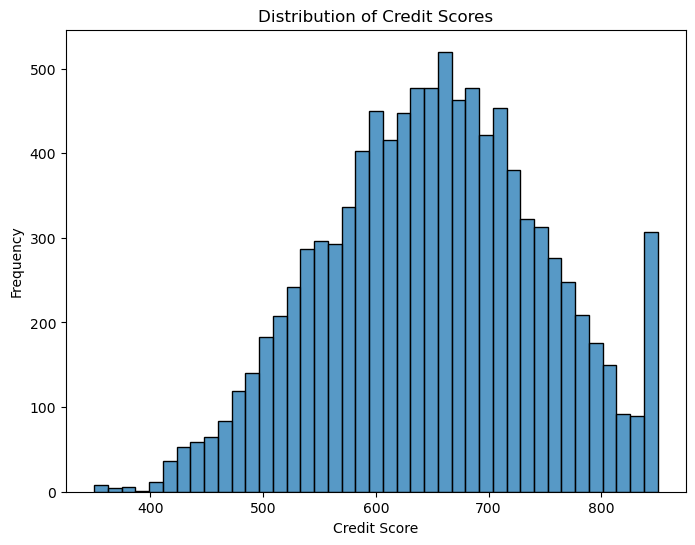

In [11]:
data = df

plt.figure(figsize=(8, 6))
sns.histplot(data['CreditScore'])
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.show()

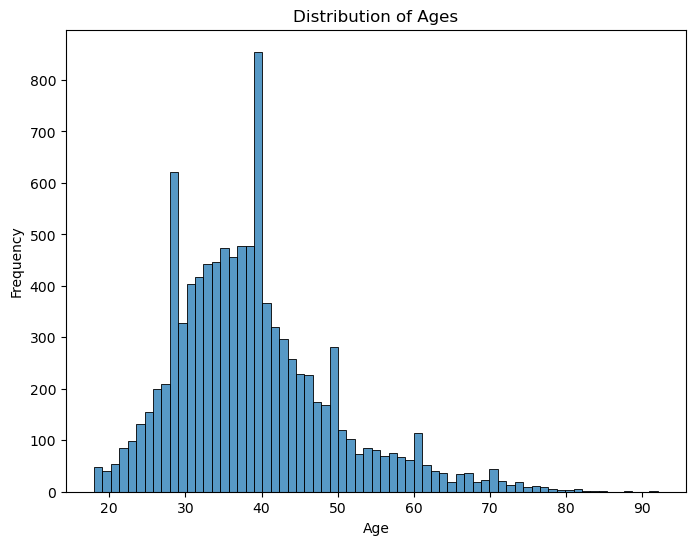

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()


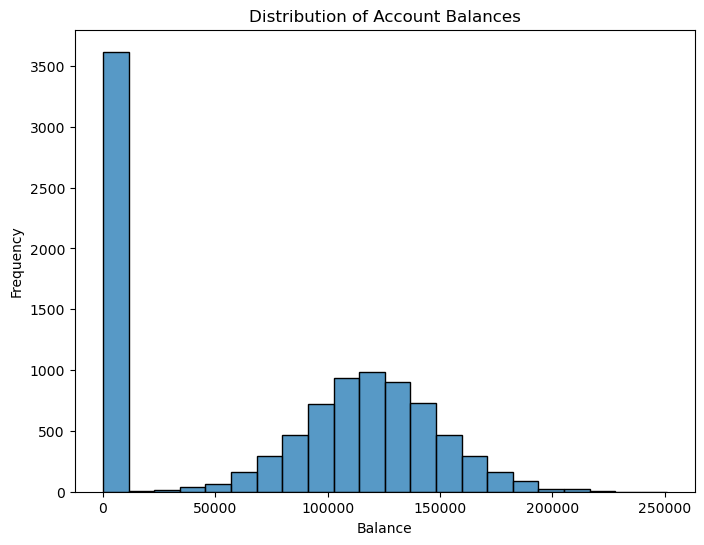

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Balance'])
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Account Balances')
plt.show()

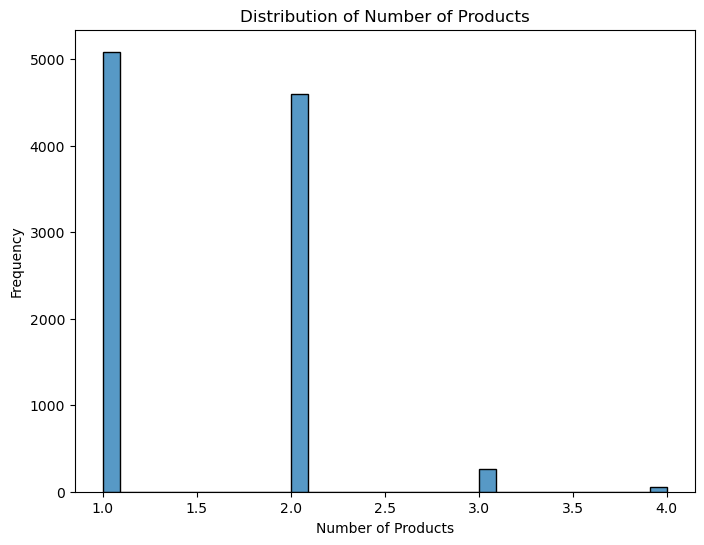

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data['NumOfProducts'])
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Products')
plt.show()

We see how varied the distributions are, and all of them are skewed. Out of the features shown above, we will go ahead and fix <b>Age and Credit Scores</b>

In order to fix skewness, we have multiple methods:

1) Log Transform

2) Inverse Transform

<b>3) BoxCox using lambda values (this is what we will use, lamba value will be obtained directly by scipy library)</b>

The reason why we did not fix the other two is because:
- Fixing Account Balance would disrupt the values which are on 0. A value on 0 means someone having no income, and banks do give a heavy weightage to person with no income. Transforming this could lead loss of information, as some more values would be converted to 0 and this may cause problems.

- Number of Products is skewed because the data provided is in that way, transforming this causes the data to change, and again lead to wrong values.

Optimal lambda value: -0.25786925086304385


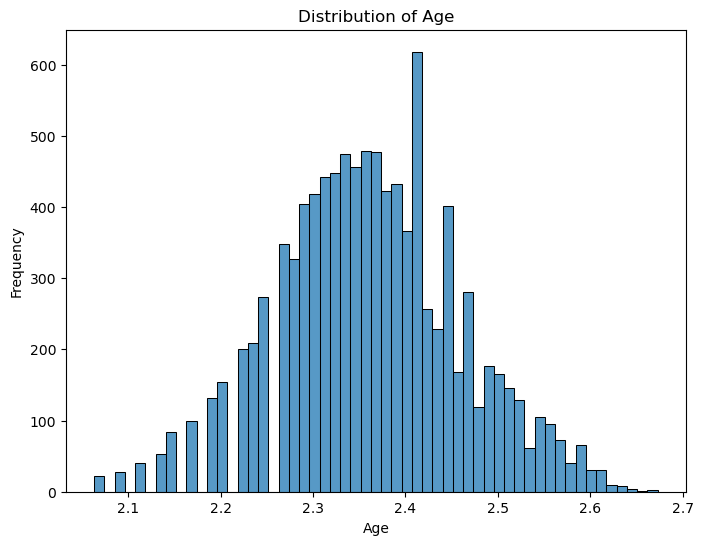

In [15]:
data['Age'], lambda_val = stats.boxcox(data['Age'] + 1) 
print("Optimal lambda value:", lambda_val)
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Optimal lambda value: 1.1291601372312923


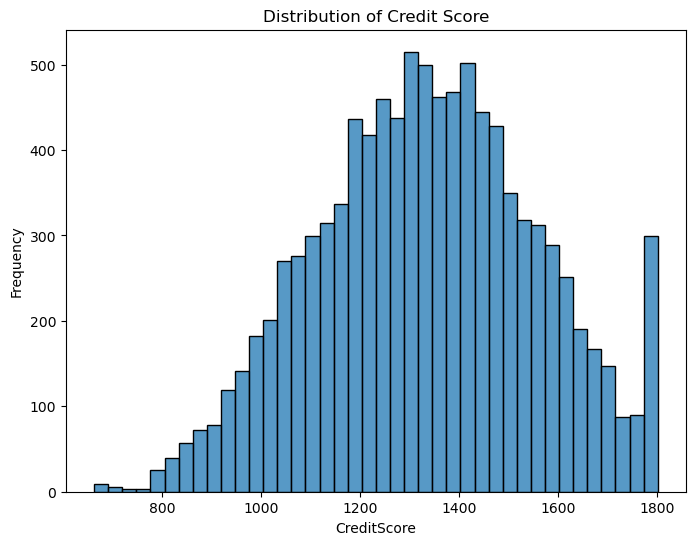

In [16]:
data['CreditScore'], lambda_val = stats.boxcox(data['CreditScore'] + 1) 
print("Optimal lambda value:", lambda_val)

plt.figure(figsize=(8, 6))
sns.histplot(data['CreditScore'])
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
plt.show()

After applying the Boxcox transformation, this is how the graphs look like. They look pretty much Normally Distributed as compared to the earlier distributions.

Below, we have printed the data, and you can take a look how values have changed for the transformed features. Such a change in value was not favorable for NumofProducts, so we skipped it.

In [17]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,France,Female,2.407725,2,0.00,1,1,1,101348.88,1
1,1233.705954,Spain,Female,2.398777,1,83807.86,1,0,1,112542.58,0
2,993.940871,France,Female,2.407725,8,159660.80,3,1,0,113931.57,1
3,1443.941075,France,Female,2.380049,1,0.00,2,0,0,93826.63,0
4,1800.489366,Spain,Female,2.416415,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1612.829287,France,Male,2.380049,5,0.00,2,1,0,96270.64,0
9996,1025.261945,France,Male,2.338795,10,57369.61,1,1,1,101699.77,0
9997,1467.268784,France,Female,2.349631,7,0.00,1,0,1,42085.58,1
9998,1615.189773,Germany,Male,2.407725,3,75075.31,2,1,0,92888.52,1


### EDA

Let us start plotting graphs and understanding the data deeper.

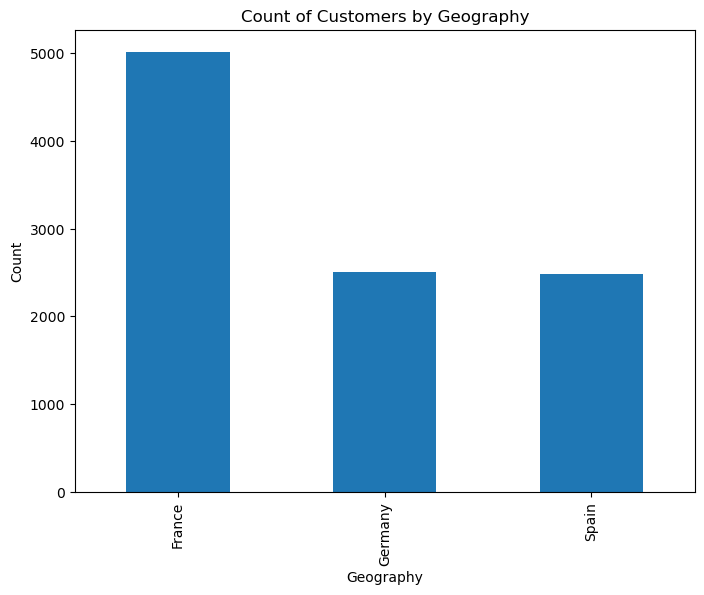

In [18]:
plt.figure(figsize=(8, 6))
data['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Customers by Geography')
plt.show()

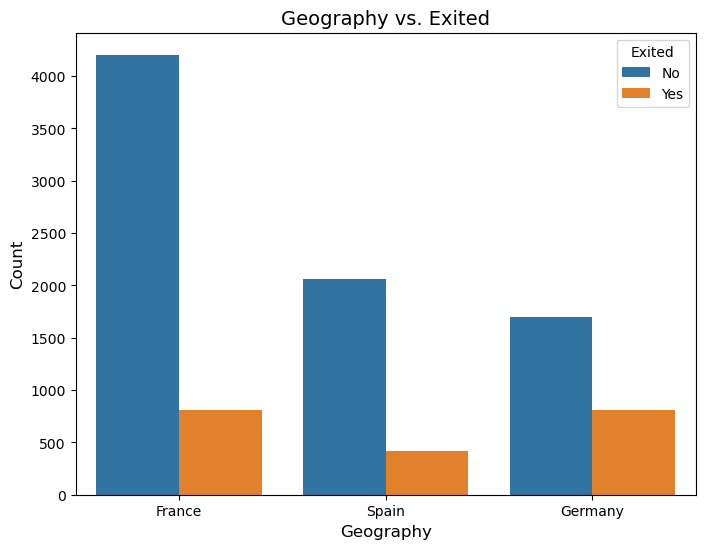

In [19]:
# Count Plot - Geography vs. Exited
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Geography vs. Exited', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


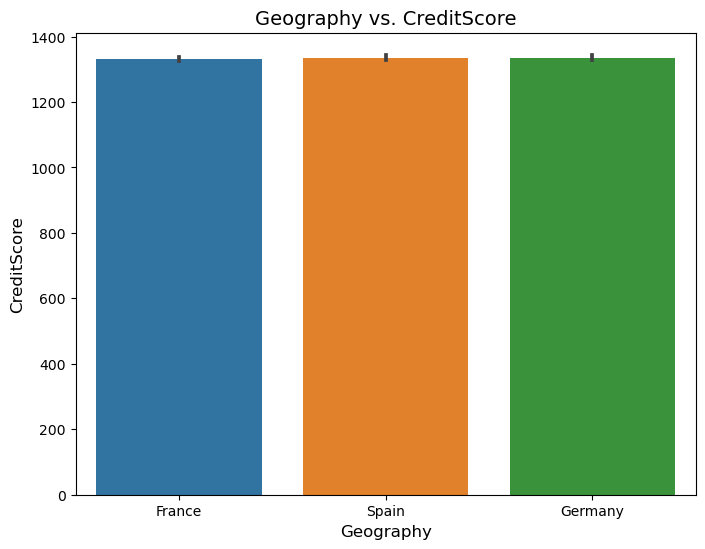

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Geography', y='CreditScore', data=data)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('CreditScore', fontsize=12)
plt.title('Geography vs. CreditScore', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

The Graphs on Geography and various features suggest that, we have data more for France as compared to Spain and Germany.

No matter how the Geographic distribution is, we see that the Credit Score for all the three countries is more or less the same. We even check who exited and who did not for all the three countries, and that shows some difference. This means, using Geography as a feature in the model might be a good idea. 

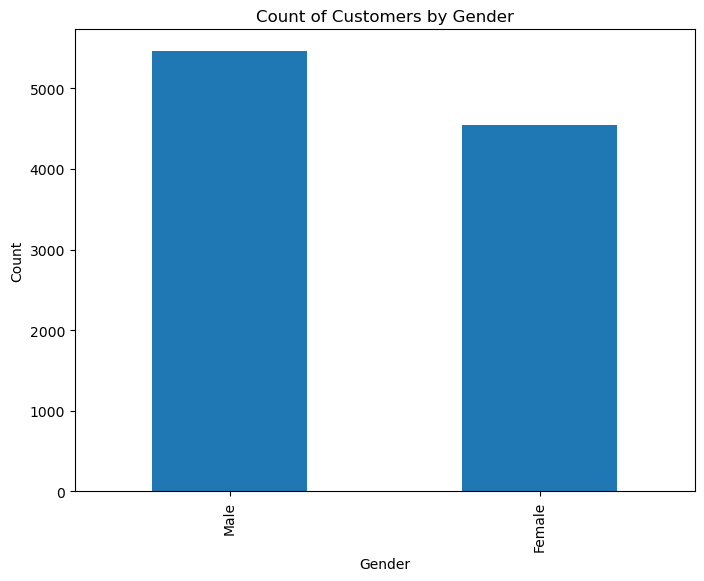

In [21]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender')
plt.show()

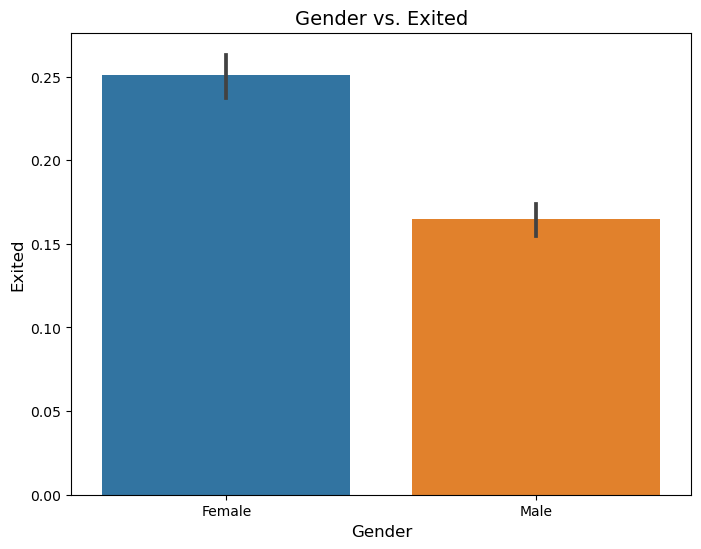

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Exited', data=data)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exited', fontsize=12)
plt.title('Gender vs. Exited', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

The data for male customers is higher than that of a female which means that the bank good use some techniques to capture more male customers and they could set their marketing techniques accordingly.

In the second graph, get to know that larger female population has exceted as compared to male population so considering gender as our feature would be an important parameter while we are training a model. This graph also shows that the bank should do something to retain their female population.

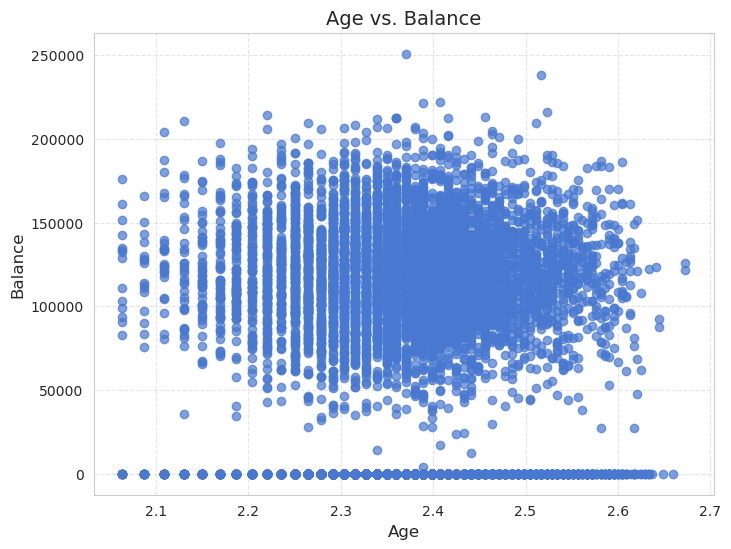

In [23]:
# Set plot style
sns.set_style("whitegrid")

# Set color palette
color_palette = sns.color_palette("muted")

# Scatter Plot - Age vs. Balance
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Balance'], color=color_palette[0], alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.title('Age vs. Balance', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


We compare Age versus the Balance but it's a scattered data that doesn't represent a clear relationship which means that it is distributed well for both the features and we cannot come to a conclusion looking at it.

However we see more data points towards the right side, when the age increases, which might help us gaining some insights.

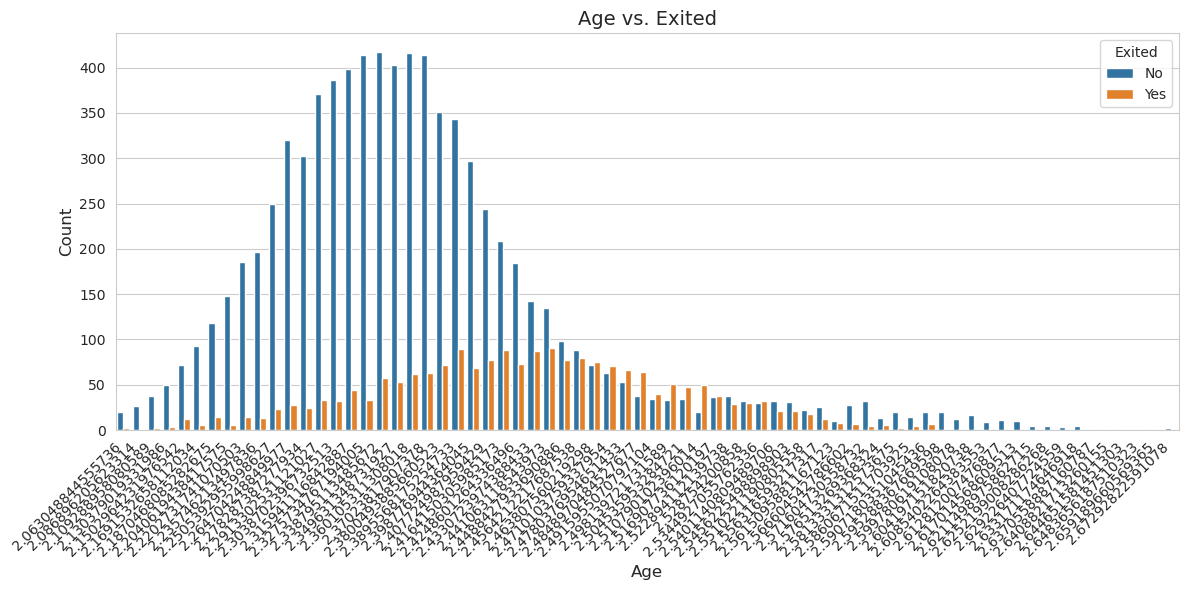

In [24]:
# Count Plot - Age vs. Exited
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', hue='Exited', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age vs. Exited', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title='Exited', labels=['No', 'Yes'])

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


From this graph we understand age distribution. It also helps us understand customer attrition that various with age.

For example if a certain age group consistently shows higher churn rates it means that that age may player use role in customer retention. It also helps us understand the customer segmentation based on the age.

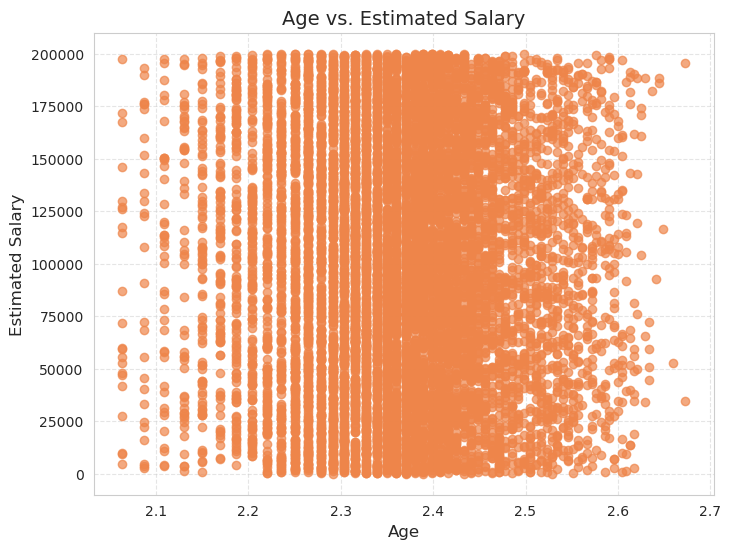

In [25]:
# Scatter Plot - Age vs. Estimated Salary
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['EstimatedSalary'], color=color_palette[1], alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.title('Age vs. Estimated Salary', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This is same like the graph we plotted above, most of the data is completely scattered and we do not see any particular relationship getting out of age and estimated salary. So, considering EstimatedSalary as a feature might not be needed.

<Figure size 800x600 with 0 Axes>

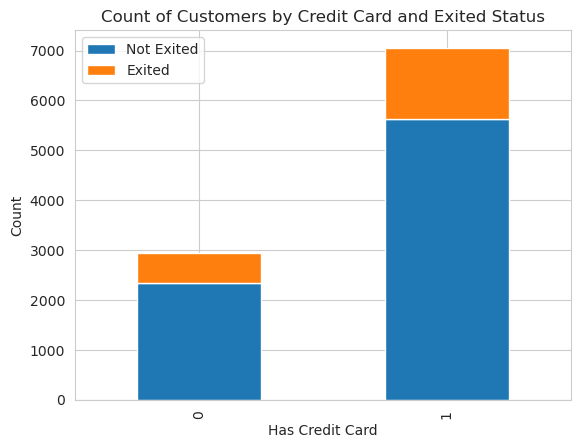

In [26]:
plt.figure(figsize=(8, 6))
data.groupby(['HasCrCard', 'Exited'])['Exited'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Count of Customers by Credit Card and Exited Status')
plt.legend(['Not Exited', 'Exited'])
plt.show()

The graph allows us to analyze whether having a credit card has any correlation with customer attrition. We can assess whether customers with or without a credit card show higher rates of churn.

<Figure size 800x600 with 0 Axes>

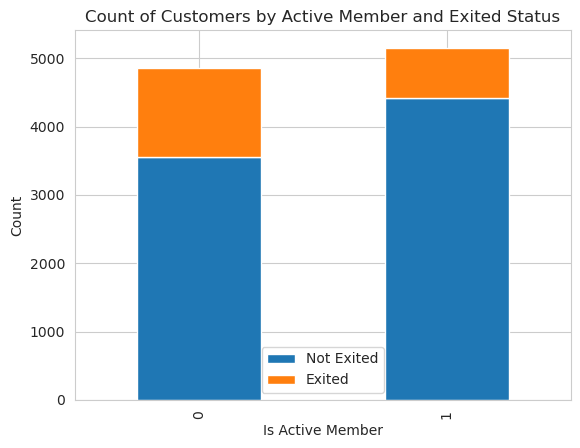

In [27]:
plt.figure(figsize=(8, 6))
data.groupby(['IsActiveMember', 'Exited'])['Exited'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.title('Count of Customers by Active Member and Exited Status')
plt.legend(['Not Exited', 'Exited'])
plt.show()

The person who is the member is is less likely to exit, which shows an interesting relation from a bank's view. The count for members and non members is roughly the same, but non members has higher exit count. 


After EDA, we get some important features that affected our target variable, like Age, Active Member, Geography and Gender.

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

col_list = data.select_dtypes(include = "object").columns
for colsn in col_list:
    data[colsn] = le.fit_transform(data[colsn].astype(str))

We perform Label Encoding to convert Geography and Gender to categorical formats, this would help us understand co-relation in a better way in the next graph. 

The Label encoded data looks like the one printed below.

In [29]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,0,0,2.407725,2,0.00,1,1,1,101348.88,1
1,1233.705954,2,0,2.398777,1,83807.86,1,0,1,112542.58,0
2,993.940871,0,0,2.407725,8,159660.80,3,1,0,113931.57,1
3,1443.941075,0,0,2.380049,1,0.00,2,0,0,93826.63,0
4,1800.489366,2,0,2.416415,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1612.829287,0,1,2.380049,5,0.00,2,1,0,96270.64,0
9996,1025.261945,0,1,2.338795,10,57369.61,1,1,1,101699.77,0
9997,1467.268784,0,0,2.349631,7,0.00,1,0,1,42085.58,1
9998,1615.189773,1,1,2.407725,3,75075.31,2,1,0,92888.52,1


Let us look into the distribution of the Numerical Variables and check if there are any outliers, if yes we would try and remove them.

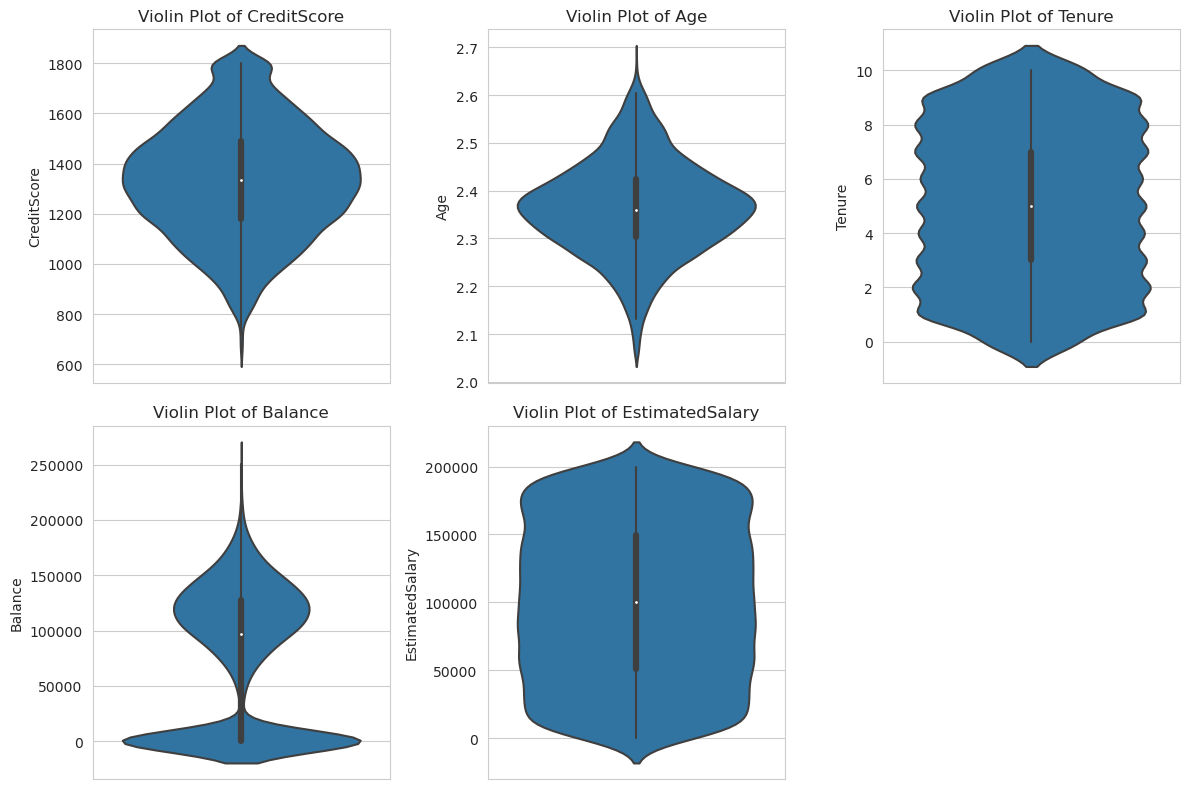

In [30]:
import seaborn as sns

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create a violin plot for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=data, y=column)
    plt.title(f"Violin Plot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [31]:
def remove_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    num_rows_before = data.shape[0]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    num_rows_after = data.shape[0]
    num_rows_removed = num_rows_before - num_rows_after
    print(f"Number of rows removed in '{column}': {num_rows_removed}")
    return data

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for column in numerical_columns:
    data = remove_outliers_iqr(data, column)

Number of rows removed in 'CreditScore': 12
Number of rows removed in 'Age': 143
Number of rows removed in 'Tenure': 0
Number of rows removed in 'Balance': 0
Number of rows removed in 'EstimatedSalary': 0


As we see, there have been no outliers using the IQR Method.

In [32]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,0,0,2.407725,2,0.00,1,1,1,101348.88,1
1,1233.705954,2,0,2.398777,1,83807.86,1,0,1,112542.58,0
2,993.940871,0,0,2.407725,8,159660.80,3,1,0,113931.57,1
3,1443.941075,0,0,2.380049,1,0.00,2,0,0,93826.63,0
4,1800.489366,2,0,2.416415,2,125510.82,1,1,1,79084.10,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

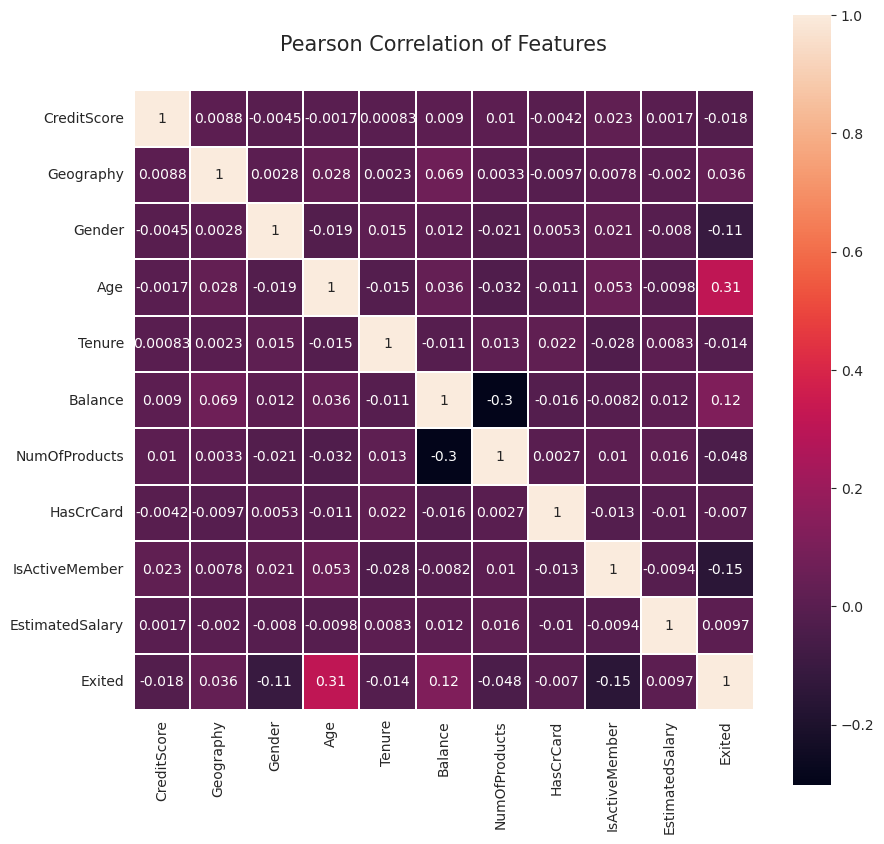

In [33]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

We see high co-relation for certain features like: age, gender, activemember, balance.

Based on out EDA, we had some features in common. Let us use two formal Feature Selection techniques and conclude the selection of features for model training.

## Feature Selection

We use:

1) Chi square test

2) ANOVA test

In [34]:
features = list(data.columns[:10])
print("features:", features, sep="\n")

features:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [35]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

y = data["Exited"]
X = data[features]

selector = SelectKBest(chi2, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
print(data.columns[selector.get_support(indices=True)].tolist())
final_features = data.columns[selector.get_support(indices=True)].tolist()

['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']


In [36]:
selector = SelectKBest(f_classif, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
#print(data.columns[selector.get_support(indices=True)].tolist())
final_features = data.columns[selector.get_support(indices=True)].tolist()
final_feature = final_features.remove("Balance")
print(final_features)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'IsActiveMember']


In [37]:
y = data["Exited"]
X = data[final_features]

Combining the results from EDA, Corelation Plot and the tests, the final features we select are:

['Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']


<i>Note that we selected 6 features, we can add more features to this as well. The idea behind keeping 6 features was, we got our idea about the features correct, based on EDA. And the model performed with the maximum Accuracy and F1 score when features  = 6</i>

### Fixing imbalance

During the data loading stage we saw that there was a huge imbalance in the Target variable. There are multiple ways to fix it:

1) Weighting : Fixing while training the model

<b> 2) Oversampling : Fixing beforehand and then training (we will use this) </b>

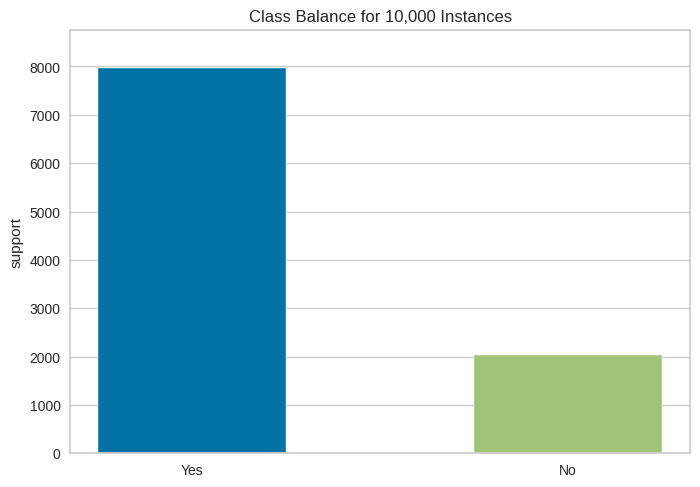

<Axes: title={'center': 'Class Balance for 10,000 Instances'}, ylabel='support'>

In [38]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=["Yes", "No"])

visualizer.fit(df["Exited"])
visualizer.show()

Plotting the graphs, we see the data is imabalance. 

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({1: 7826, 0: 7826})


We performed oversampling and we see both the classes have same number of points now. 

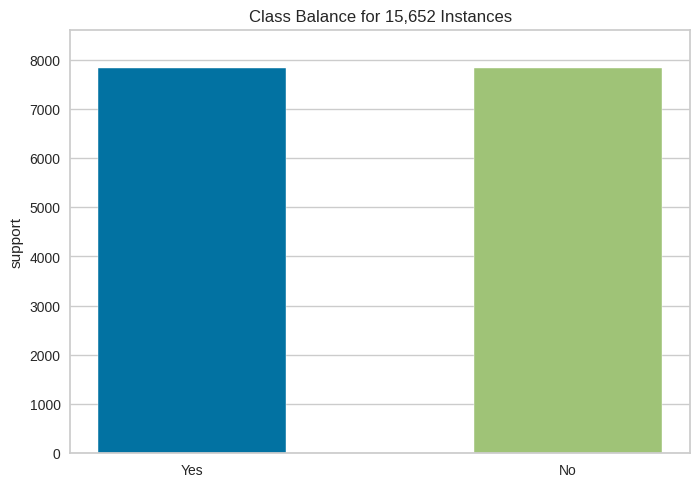

<Axes: title={'center': 'Class Balance for 15,652 Instances'}, ylabel='support'>

In [40]:
visualizer = ClassBalance(labels=["Yes", "No"])
visualizer.fit(y)
visualizer.show()

Finally, we fix the imbalance and we see both the classes have same number of points now. Now we can move forward and perform the test train split. We will keep the ratio of 80 and 20 for the data. 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Model training 

We would go about this in 2 steps, first we would train a vanilla Logistic Regression Model and see the results. The We would add some hyper parameters and perform cross validation and check the results. 

Finally, we would compare both the models on the basis of Accuracy, F1 Score and AUC and select the model. 

Let us start with the vanilla model. 

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
pred = clf.predict(X_test)

In [44]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(f1_score(y_test, pred))
print(roc_auc_score(y_test, pred))

0.7262855317789844
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1554
           1       0.72      0.74      0.73      1577

    accuracy                           0.73      3131
   macro avg       0.73      0.73      0.73      3131
weighted avg       0.73      0.73      0.73      3131

0.7307571473452718
0.7262027178006886


The basic Logistic Regression model gives us and Accuracy of 57.03%, F1 Score of 63.18%

Let us add Hyperparameter Tuning and Cross Validation and check the metrics for the same. 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter = 10000)


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 1, 10],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(best_params)

logreg_best = LogisticRegression(**best_params)
logreg_best.fit(X_train, y_train)
y_pred = logreg_best.predict(X_test)

print(classification_report(y_test, y_pred))

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1554
           1       0.77      0.76      0.76      1577

    accuracy                           0.76      3131
   macro avg       0.76      0.76      0.76      3131
weighted avg       0.76      0.76      0.76      3131



In [46]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.7633343979559246
0.7634854771784233
0.7633708987545387


From the gird search results, the best hyperparameters for the Logistic Regression are : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

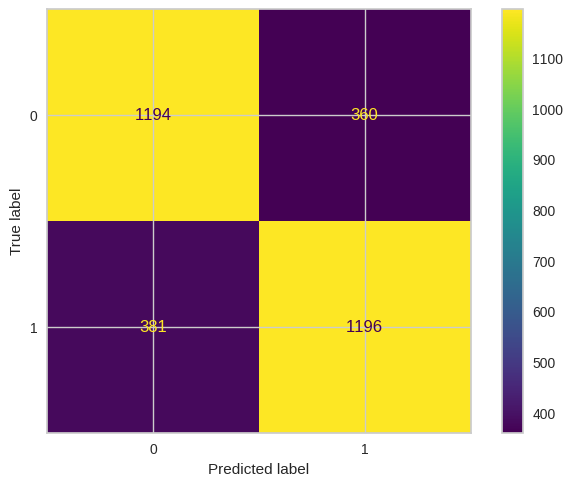

In [47]:
cm = confusion_matrix(y_test, y_pred, labels=logreg_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg_best.classes_)
disp.plot()

plt.show()

### Conclusion

The conclusion that can be drawn from this project is:

- In this study, we focused on analyzing customer churn in a bank and developing a predictive model to forecast whether a customer is likely to leave the bank. By analyzing a comprehensive dataset that included customer demographics, account details, and transaction history, we aimed to identify key factors contributing to customer churn and build an accurate predictive model.

- Through exploratory data analysis, we gained valuable insights into the dataset. We discovered that factors such as age, account balance, number of products, and customer activity played significant roles in influencing churn behavior.

- By preprocessing the data, fixing skewed values, and encoding categorical variables, we prepared the dataset for model development. We employed logistic regression as our chosen algorithm due to its interpretability and ability to handle binary classification tasks effectively.

- Comparing the results, it is evident that the logistic regression model with hyperparameters performs significantly better than the normal logistic regression model. It achieves a higher accuracy, F1-score, and is more robust in predicting customer churn. Additionally, examining the confusion matrices for both models can provide further insights into their performance. The confusion matrix shows the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

- The Logistic Regression with hyperparameter tuning and cross validation achieves an Accuracy and F1 Score near to 70%, which is way better than 55% obtained by vanilla model.



# Pipeline

Number of rows removed in 'CreditScore': 2
Number of rows removed in 'Age': 0
Number of rows removed in 'Tenure': 0
Number of rows removed in 'Balance': 0
Number of rows removed in 'EstimatedSalary': 0
{'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1575
           1       0.75      0.77      0.76      1556

    accuracy                           0.76      3131
   macro avg       0.76      0.76      0.76      3131
weighted avg       0.76      0.76      0.76      3131



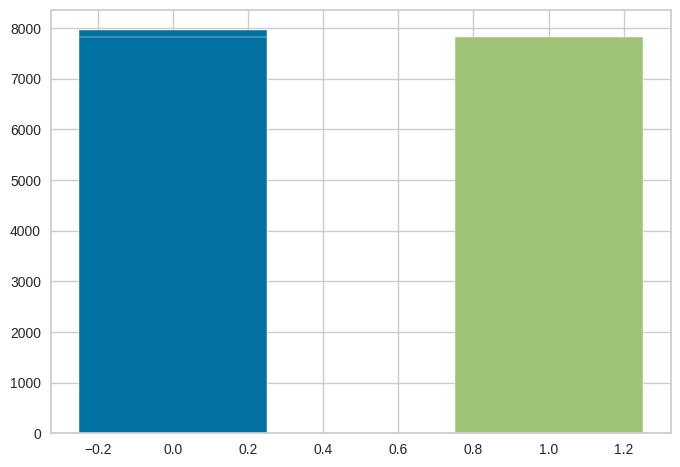

In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/kaggle/input/churn-modeling-dataset/Churn_Modelling.csv")
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

data['Age'], lambda_val = stats.boxcox(data['Age'] + 1) 
data['CreditScore'], lambda_val = stats.boxcox(data['CreditScore'] + 1) 

le = preprocessing.LabelEncoder()
col_list = data.select_dtypes(include = "object").columns
for colsn in col_list:
    data[colsn] = le.fit_transform(data[colsn].astype(str))
    
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

def remove_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    num_rows_before = data.shape[0]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    num_rows_after = data.shape[0]
    num_rows_removed = num_rows_before - num_rows_after
    print(f"Number of rows removed in '{column}': {num_rows_removed}")
    return data

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for column in numerical_columns:
    data = remove_outliers_iqr(data, column)
    
features = list(data.columns[:10])

y = data["Exited"]
X = data[features]

selector = SelectKBest(chi2, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
final_features = data.columns[selector.get_support(indices=True)].tolist()

selector = SelectKBest(f_classif, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
final_features = data.columns[selector.get_support(indices=True)].tolist()
final_feature = final_features.remove("Balance")

y = data["Exited"]
X = data[final_features]

visualizer = ClassBalance(labels=["Yes", "No"])

visualizer.fit(df["Exited"])

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

visualizer.fit(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


pipeline = Pipeline([
    ('scaler', preprocessing.StandardScaler()),  
    ('logreg', LogisticRegression(max_iter=10000)) 
])
param_grid_pipeline = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 1, 10],
    'logreg__solver': ['liblinear', 'saga']
}

grid_search_pipeline = GridSearchCV(pipeline, param_grid_pipeline, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_pipeline.fit(X_train, y_train)
best_params_pipeline = grid_search_pipeline.best_params_
print(best_params_pipeline)

logreg_best_pipeline = grid_search_pipeline.best_estimator_
y_pred_pipeline = logreg_best_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_pipeline))

## Saving and reloading the model

In [49]:
import pickle

with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg_best_pipeline, file)


In [50]:
with open('logreg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [51]:
from sklearn.metrics import confusion_matrix

y_pred_loaded = loaded_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_loaded)
print(cm)

print(classification_report(y_test, y_pred_loaded))

[[1179  396]
 [ 360 1196]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1575
           1       0.75      0.77      0.76      1556

    accuracy                           0.76      3131
   macro avg       0.76      0.76      0.76      3131
weighted avg       0.76      0.76      0.76      3131



We get the same metrics as above.